### 학습관련기술들   
표준편차 0.01, Xavier, He 초기값 각각에 대해 학습 속도를 측정해보자

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

======= iteraton: 0==========
std=0.01:2.3025709586278587
Xavier:2.3129374171409323
He:2.4156944511024943
======= iteraton: 100==========
std=0.01:2.302252778418816
Xavier:2.276128908427272
He:1.6426766051546027
======= iteraton: 200==========
std=0.01:2.302580278773498
Xavier:2.2122500087716617
He:0.847904002820971
======= iteraton: 300==========
std=0.01:2.300449525008082
Xavier:2.097282717801501
He:0.5360081526042921
======= iteraton: 400==========
std=0.01:2.3032689804074398
Xavier:1.7543391985527041
He:0.4726033557822836
======= iteraton: 500==========
std=0.01:2.3001435686395197
Xavier:1.0881604025463432
He:0.35005321890209085
======= iteraton: 600==========
std=0.01:2.301329694135787
Xavier:0.8621618166804728
He:0.33226177501227305
======= iteraton: 700==========
std=0.01:2.301121154312351
Xavier:0.6327067036591005
He:0.3123624212013151
======= iteraton: 800==========
std=0.01:2.3042639033633967
Xavier:0.5350693587432509
He:0.28253352208641813
======= iteraton: 900==========
std

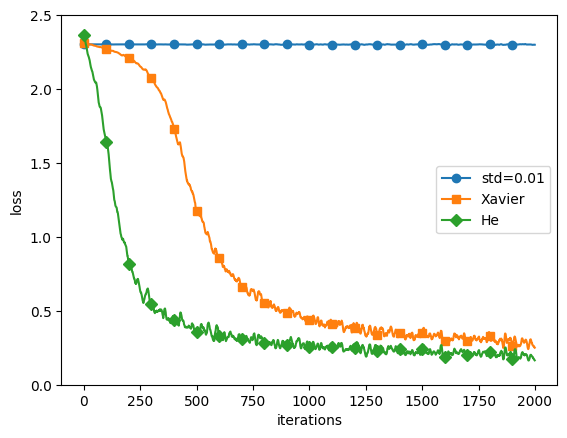

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정
weight_init_type = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_type.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                    output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_type.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads) # 확률적 경사하강법

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("======= iteraton: "+str(i)+"==========")
        for key in weight_init_type.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기
# 각각의 초기값을 신경망에 넣었을 때 얼마나 빠르고 잘 학습하는지 확인
markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)

for key in weight_init_type.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0,2.5)
plt.legend()
plt.show()